<a href="https://colab.research.google.com/github/gkrry2723/ML_pytorch_study/blob/master/0_pytorch_%EA%B8%B0%EC%B4%88_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CHAPTER 1. 파이토치의 기본**



**1. 텐서 생성하기**

In [ ]:
import numpy as np
import torch

#중첩 list를 지정
t = torch.tensor([[1, 2],
                  [3, 4]
                  ])

#device 지정 -> GPU에 텐서 사용 가능
t = torch.tensor([[1, 2],
                  [3, 4]
                  ], device = "cuda:0")

#dype을 사용하여 데이터 형을 지정하여 텐서 만들기
t = torch.tensor([[1, 2],
                  [3, 4]
                  ], dtype = torch.float64)

# 0부터 9까지의 수치로 초기화 된 1차원 텐서
t = torch.arange(0,10)

# 모든 값이 0 인 100 X 10의 텐서를 작성하여 to 메서드로 GPU에 전송
t = torch.zeros(100, 10).to("cuda:0")

#정규 난수로 100 X 10의 텐서를 작성
t = torch.randn(100,10)

#텐서의 shape은 size 메서드로 확인가능
t.size()

torch.Size([100, 10])

**2. 텐서를 numpy로 변환하기**

In [ ]:
# numpy 메서드를 사용하여 ndarray로 변환
t = torch.tensor([[1, 2],
                  [3, 4]])
x = t.numpy()

# GPU상의 텐서는 to 메서드로 CPU의 텐서로 변환할 필요가 있다.
t = torch.tensor([[1, 2],
                  [3, 4]
                  ,device = "cuda:0")
x = t.to(CPU).numpy()



**3. 텐서의 인덱스 조작**
 - 인덱스 조작: 인덱스를 지정하여 배열의 값을 가져오거나 변경하는 것

In [ ]:
import numpy as np
import torch

t = torch.tensor([[1, 2, 3],
                  [4, 5, 6]
                  ])

# 스칼라 첨자 지정
print( t[0,2] )

# 슬라이스로 지정 ** 주의: 항상 끝은 포함 안댐
print( t[:,:2])    

# 리스트로 지정  ** 지정한 인덱스가 나옴
print( t[:,[1,2]])

# 마스크 배열을 사용하여 3보다 큰 부분만 선택
# 마스크 배열: 원 배열과 크기는 같으며 각 요소가 True/False로 설정되어 있는 배열을 가르킨다.
print( t[ t > 2 ])

# [0, 1]의 요소를 100으로 설정
t[0,1] = 100
print(t)

# 슬라이스를 사용한 일괄 대입
t[: , 1] = 200
print( t )

# 마스크 배열을 사용하여 특정 조건의 요소만 치환
t[ t>2 ] = 400
print(t)
 

tensor(3)
tensor([[1, 2],
        [4, 5]])
tensor([[2, 3],
        [5, 6]])
tensor([3, 4, 5, 6])
tensor([[  1, 100,   3],
        [  4,   5,   6]])
tensor([[  1, 200,   3],
        [  4, 200,   6]])
tensor([[  1, 400, 400],
        [400, 400, 400]])


**4. 텐서 연산**

 - 행렬곱, 선형대수 계산 시에 GPU를 사용 가능하여 대규모 데이터를 처리할 때는 Numpy/SciPy보다 훨씬 빠름
 - 사칙연산: 텐서간/ 텐서와 스칼라값 사이에 가능. ndarray와는 불가능. 동일한 형이여야함. 



In [ ]:
# 길이 3인 벡터
v = torch.tensor([1, 2, 3])
w = torch.tensor([0, 10, 20])

# 2 X 3인 벡터
m = torch.tensor([[0, 1, 2],
                  [100, 200, 300]])

# 벡터와 스칼라의 덧셈
v2 = v + 10
print(v2)

# 제곱도 같은 방식
v2 = v ** 2
print( v2 )

# 동일 길이의 벡터간 뺄셈
v2 = w - v
print( v2 )

# 여러가지 조합
v2 = 2 * v - w / 10 + 6
print( v2 )

# 행렬과 스칼라
m2 = m * 2
print( m2 )

# 행렬과 백터 : 2,3인 행렬과 3, 인 벡터이므로 브로드캐스트가 작동
m3 = m + v
print( m3 )

# 행렬간 처리
m4 = m + m
print( m4 )

tensor([11, 12, 13])
tensor([1, 4, 9])
tensor([-1,  8, 17])
tensor([ 8.,  9., 10.])
tensor([[  0,   2,   4],
        [200, 400, 600]])
tensor([[  1,   3,   5],
        [101, 202, 303]])
tensor([[  0,   2,   4],
        [200, 400, 600]])


**5. 수학 함수를 이용한 텐서 연산**

In [ ]:
t = torch.tensor([[1,-2,3,-4.],
                  [-5,6,-7,8.]])

# 수학함수를 포함하는 수식
y =  t * 2 + torch.abs(t)
print(y)

# 평균치 구하기
m = torch.mean(t)
print(m)

# 함수가 아닌 메서드로도 사용 가능
m = t.mean()
print(m)

# 집계 결과는 0차원의 텐서로 item 메서드를 사용하여 값을 추출 할 수 있다.
m_value = m.item()
print(m_value)

# 집계는 차원을 지정할 수도 있다. 행 방향으로 집계하여 열 단위로 평균값을 계산한다.
m2 = t.mean(0)
print(m2)

m3 = t.mean(1)
print(m3)


tensor([[ 3., -2.,  9., -4.],
        [-5., 18., -7., 24.]])
tensor(0.)
tensor(0.)
0.0
tensor([-2.,  2., -2.,  2.])
tensor([-0.5000,  0.5000])


**6. 텐서의 인덱스 조작 예시**

In [ ]:
x1 = torch.tensor([[1,2],
                   [3,4.]])
x2 = torch.tensor([[10, 20, 30],
                   [40, 50, 60.]])

# 2 x 2를 4 x 1로 보여줌
x1.view(4,1)

# -1은 표현할 수 있는 자동화된 값으로 대체되며 한번만 사용할 수 있다.
x1.view(1,-1)

# 2 x 3을 전치하여 3 x 2로 만든다.
x2.t()
print(x2.t())

# dim = 1로 결합하면 2 x 5 의 텐서를 만든다.
torch.cat([x1,x2], dim = 1)
torch.cat([x1,x2.t()], dim = 0)

#HWC를 CHW로 변환
#64x32x3의 데이터가 100개

hwc_img_data = torch.rand(100,64,32,3)
chw_img_data = hwc_img_data.transpose(1,2).transpose(1,3)

tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])
tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])


**7. 그외 연산의 예**

 - dot : 내적
 - mv : 행렬과 벡터의 곱
 - mm : 행렬 행렬 곱
 - matmul : 인수의 종류에 따라 자동으로 dot,mv, mm을 선택하여 실행
 - gesv: LU 분해를 사용한 연립방정식의 해
 - eig, symeig: 고유갑 분해
 - svd: 특이값 분해

In [ ]:
m = torch.randn(100,10)
v = torch.randn(10)

#내적
d = torch.dot(v,v)

# 100 x 10의 행렬과 길이 10인 벡터의 곱
# 결과는 길이 100인 벡터
v2 = torch.mv(m,v)

# 행렬곱
m2 = torch.mm(m.t(),m)

# 특이값 분해
u, s, v = torch.svd(m)

**8. 텐서와 자동미분**

 - requires_grad 라는 속성을 True로 설정하면 자동 미분 기능이 활성화 됨
 

In [ ]:
x = torch.randn(100,3)
# 미분의 변수로 사용하는 경우는 requires_grad를 True로 설정
a = torch.tensor([1,2,3.], requires_grad=True)

# 계산을 통해 자동으로 계산 그래프가 구축된다.
y = torch.mv(x,a)
o = y.sum()

# 미분을 실행
o.backward()

#분석 답과 비교
a.grad != x.sum()

tensor([True, True, True])

**파이토치로 선형 회귀 모델 만들기 --> 직접 만들기**

y = 1+2x(1)+3x(2)

tensor([1.0482, 1.9353, 2.9596], requires_grad=True)


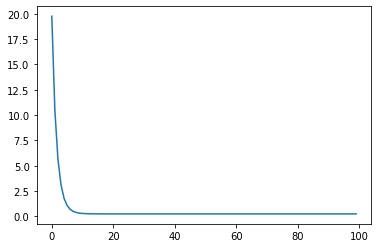

In [ ]:
import torch
from matplotlib import pyplot as plt

# 우리가 만들고자 하는 진짜 값.
# y = 1 + 2x+ 3x
w_true = torch.Tensor([1,2,3])

# x 데이터 준비. 절편을 위해 최초 차원에 1을 추가해줌 
X = torch.cat([torch.ones(100,1), torch.randn(100,2)],1)

# y 값 준비. 아마 뒤에 랜덤 값 더하는 것은 불확실성을 주기 위한 것 같음!
y = torch.mv(X, w_true) + torch.randn(100)*0.5

# x의 계수를 찾기 위한 변수 준비! 세타에 해당함. requires_grad를 해야 나중에 gradient descent를 해줌
w = torch.randn(3,requires_grad = True)

# 학습률
learning_rate = 0.1

#경사 하강법으로 파라미터 최적화 하기
losses = []

for epoc in range(100):
  # 전회의 backward 계산값을 초기화해줘야함!!
  w.grad = None

  #선형모델로 y 예측값 계산
  y_pred = torch.mv(X,w)

  #MSE loss와 w에의한 미분을 계산
  #이게 loss 계산이고
  loss = torch.mean((y-y_pred)**2)

  #이게 계산한 loss에 의한 gradient descent를 하는 과정같음
  #신기한게 loss에서 backward를 하면 아마 w.grad에 미분한 값이 저장되는 것 같음.
  loss.backward()

  #w를 그대로 대입하여 갱신하면 다른 텐서가 되어 계산 그래프가 망가지므로 data만 갱신한다고 한다.
  w.data = w.data - learning_rate*w.grad.data

  #수렴확인을 하기 위해 loss를 기록해둔다.
  losses.append(loss.item())

plt.plot(losses)


# 내가 이해한 순서
# x, y 데이터 준비
# 임의의 세타값( w ) 준비하기 -> 이때 requires_grad = True로 해줘야함.
# learning rate 준비, plot을 위해 loss 리스트 준비
# 
# epoc for문 시작
# w.grad 항상 None으로 초기화 해주기
# y_pred 계산. w와 X 곱해주기
# loss 계산. mean 함수로 MSE 계산해주기
# loss.backward로 미분해주기
# w.data 함수 갱신해주기
# 수렴 확인을 위해 loss 리스트에 loss값 추가

print(w)

**파이토치로 선형 회귀모델 만들기 --> nn, optim모듈 사용**

In [ ]:
from torch import nn, optim

# Linear 층을 작성하기
# 입력층을 3개로 하고 bias(절편)을 False로. 
# 무조건 1로 할거면 bias True로 하면 되는거같은데 여기서는 그냥 1이라는 것도 수렴하나 보려고 변수에 포함시켜서 하는것 같음 ㅇㅇ
# net 만드는데 input output 개수 정하는 것 같음. 여기선 input은 3개(x), output은 1개 (y) 임
net = nn.Linear(in_features = 3, out_features = 1, bias = False)

# SGD 최적화기상에서 정의한 네트워크의 파라미터를 전달하여 초기화
# SGD: gradient descent인데 계속해서 업데이트하는 그런 종류인가봄. 그냥 gd라고 생각하자.
optimizer = optim.SGD(net.parameters(), lr = 0.1)

# MSE loss 클래스
# loss function도 골라주고
loss_fn = nn.MSELoss()


losses = []
for epoc in range(100):
  # gd로 인한 backward method값 초기화하기
  optimizer.zero_grad()

  # 파라미터를 우리가 직접 만들어서 들고있는게 아니고 nn.Linear에서 인풋 아웃풋 개수만 알려주면 알아서 세타를 자기들이 갖고있네...
  y_pred = net(X)

  # MSE loss 계산
  # y_pred는 (n,1)과 같은 shape이므로 (n,) 으로 변경해줄 필요가 있다.
  loss = loss_fn(y_pred.view_as(y), y)
  
  # loss를 이용하여 backward
  loss.backward()

  # backward를 한 뒤 경사를 갱신하기
  optimizer.step()

  # 수렴확인을 위하여 loss 기록하기
  losses.append(loss.item())

  print(list(net.parameters()))
  plt.plot(losses)

# nn, optim 모듈을 사용하여 선형 회귀 만드는 방법
# 넷망을 만들기. nn.Linear(input개수, output개수, bias유무)
# optimizer 만들기 optim.SGD(넷망.parameters(), lr = 러닝레이트)
# loss function 만들기. nn.MSELoss()
#
# for epoc 돌리기
# optimizer. zero_grad() -> gradient 0으로 초기ㅗ하
# y_pred계산 : net
# loss 계산 : loss_fn
# optimize하기(backward)
# opmize한거 경사 갱신
# loss 수렴위해 append



**파이토치로 로지스틱 회귀 구현하기 - nn, optim 사용**
iris: (0,1,2) 세종류로 구분된다.
(0,1) 두 개 데이터만 사용한다.
원래는 학습용과 테스트용으로 나눠야 하지만 여기선 생략한다.

100


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


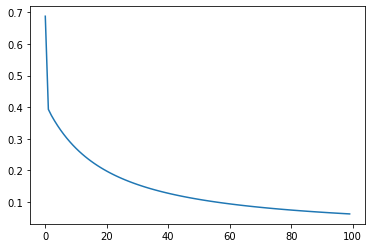

In [ ]:
import torch
from torch import nn, optim
from matplotlib import pyplot as plt
# iris 데이터 준비-> 붓꽃 데이터. 4개 데이터로 구성되어 해당 붓꽃의 특징을 설명함
from sklearn.datasets import load_iris
iris = load_iris()

#data 불러오기
X = iris.data[:100]
y = iris.target[:100]

#원래 ndarray 타입이어서 tensor로 변환
X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.float32)

#모델 작성
net = nn.Linear(4,1)

#classify 문제이므로 시그모이드 함수를 적용
loss_fn = nn.BCEWithLogitsLoss()

#optimizer 생성
optimizer = optim.SGD(net.parameters(),lr = 0.1)

#손실함수 로그
losses = []

for epoc in range(100):
  optimizer.zero_grad()
  y_pred = net(X)
  loss = loss_fn(y_pred.view_as(y),y)
  loss.backward()
  optimizer.step()
  losses.append(loss.item())

#loss 출력
plt.plot(losses)

# 예측 값 출력
h = net(X)
prob = nn.functional.sigmoid(h)
y_pred = prob>0.5

print((y.byte() == y_pred.view_as(y)).sum().item())



**다중분류를 위한 로지스틱 회귀 분석**

 - 0~9 손글씨를 분류하는 것으로 테스트

tensor([[ 7.7461, -6.2917, -2.5632,  ..., -2.9443, -1.0543,  1.5886],
        [-7.8184,  5.9613, -0.6364,  ..., -3.4927, -0.0689, -1.6801],
        [-3.6116,  3.1216,  3.6955,  ..., -2.0875,  3.4908, -4.7576],
        ...,
        [-6.0514,  2.6378, -0.8570,  ..., -3.7489,  4.9286, -2.2082],
        [ 1.0245, -0.4017, -4.9598,  ..., -3.7346,  1.3785,  3.9139],
        [-3.4057, -1.1002, -1.8579,  ..., -4.3997,  4.1895,  0.0777]],
       grad_fn=<AddmmBackward>)
tensor([0, 1, 2,  ..., 8, 9, 8])
0.9499165275459098


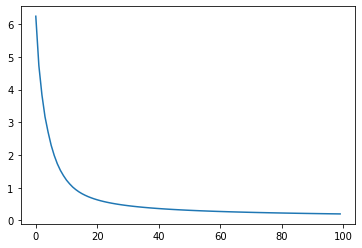

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype=torch.float32)
#CrossEntrophy 함수는 y로 int64형의 텐서를 받음
y = torch.tensor(y, dtype = torch.int64)

#출력은 10차원
net = nn.Linear(X.size()[1], 10)

#소프트맥스 크로스 엔트로피를 로스함수로 사용하기
loss_fn = nn.CrossEntropyLoss()

#optimizer
optimizer = optim.SGD(net.parameters(), lr = 0.01)

#loss 로그
losses = []

for epoc in range(100):
  optimizer.zero_grad()

  y_pred = net(X)
  loss = loss_fn(y_pred,y)
  loss.backward()

  optimizer.step()

  losses.append(loss)

plt.plot(losses)
#정답률
#torch.max는 (위치, 최댓값)을 반환한다.
#우리는 위치는 필요없으므로 __로 받고 사용하지 않는다.
_, y_pred = torch.max(net(X),1)
print(net(X))
print(y_pred)
print((y_pred == y).sum().item() / len(y))

**다층 퍼셉트론 - Multi-Layer Perceptron**
  - 선형계층을 여러개 연결 한 것.
  - 입력층 - 숨김층 - 출력층으로 구성
  - 출력층
    - 회귀 문제: 선형회귀
    - 분류 문제: 로지스틱 회귀
  - 각 층의 레이어에 활성화 함수를 적용 (activation function)

다층 퍼셉트론의 net 만드는 방법

> nn 모듈을 층으로 쌓아서 신경망을 구축할 때 nn.Sequential을 사용한다.

층이 일직선으로 쌓인 형태의 신경망 -> 피드포워드(Feedforward)




In [ ]:
import torch
from torch import nn


net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU()
    nn.Linear(16, 10)
)

손글씨 숫자 분류 문제를 MLP를 사용하여 해결하기

0.9977740678909294


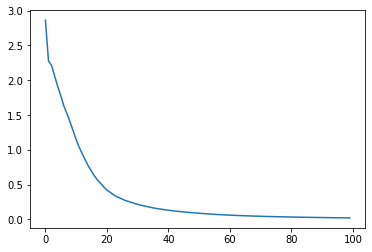

In [ ]:
import torch
from torch import nn, optim
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt

#0. 데이터 처리
digits = load_digits()

X = digits.data
y = digits.target

X = torch.tensor(X, dtype = torch.float32)
y = torch.tensor(y, dtype = torch.int64)

# to 메서드를 이용하여 GPU로 전송하기ㅏ
# X = X.to("cuda:0")
# y = y.to("cuda:0")
# net.to("cuda:0")

#1. net 생성
net = nn.Sequential(
    nn.Linear(X.size()[1],32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

#2. loss_fn
loss_fn = nn.CrossEntropyLoss()

#3. optimizer 생성
optimizer = optim.Adam(net.parameters(),lr = 0.01)

#4. loss 저장
losses =[]

#for 문 시작
for epoc in range(100):
  #1. gradient 초기화
  optimizer.zero_grad()

  #2. net에 넣어 계산
  y_pred = net(X)

  #3. loss 계산
  loss = loss_fn(y_pred, y)

  #4. backpropagation
  loss.backward()

  #5. optimize
  optimizer.step()

  losses.append(loss)

plt.plot(losses)

#정답률
#torch.max는 (위치, 최댓값)을 반환한다.
#우리는 위치는 필요없으므로 __로 받고 사용하지 않는다.
_, y_pred = torch.max(net(X),1)
print((y_pred == y).sum().item() / len(y))





**dataset과 dataloader**

 데이터가 너무 커지거나 신경망 계층, 파라미터가 증가하게 되면 전체 데이터를 메모리에서 처리하기 어려워진다. 이럴 땐 데이터의 일부 미니 배치(mini-batch)만 사용하는 SGD 학습법을 사용 할 수 있다.

 - TensorDataset
  - Dataset을 상속한 클래스
  - 학습데이터 X와 레이블 Y를 묶어놓은 컨테이너
  - TensorDataset을 DataLoader에 전달하면 for 루프에서 데이터 일부만 간단히 추출 할 수 있다. 
  - Tensor만 전달 가능
  

* Tensordataset을 DataLoarder에 전달하여 데이터의 일부만 간단히 추출하는 예


1.0


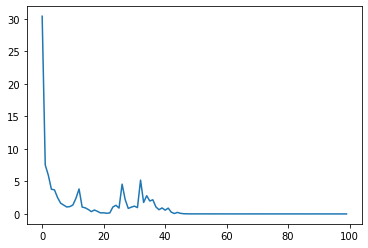

In [ ]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

#dataset 작성
ds = TensorDataset(X,y)

#순서로 섞어서 64개씩 데이터를 반환하는 DataLoader 작성
loader = DataLoader(ds, batch_size = 64, shuffle = True)

net = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(),lr = 0.01)

losses = []

for epoc in range(100):
  running_loss = 0.0
  for xx,yy in loader:
    # xx,yy는 64개만 받는다.
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  losses.append(running_loss)

plt.plot(losses)

#정답률
#torch.max는 (위치, 최댓값)을 반환한다.
#우리는 위치는 필요없으므로 __로 받고 사용하지 않는다.
_, y_pred = torch.max(net(X),1)
print((y_pred == y).sum().item() / len(y))
  

**학습 효율화 팁** 
  머신러닝의 공통적인 문제: 과학습(overlearning)
  과학습을 교정할 수 있도록 도와주는 작업: 정규화

  - Dropout을 사용한 정규화: 과학습을 덜 할 수 있도록 도와줌
  - Batch Normalization: 학습 가속

학습 신경망의 층을 과하게 늘린 코드

  -> test 결과가 상승. 과학습의 대표적인 예
  -> regularization을 해줘야함

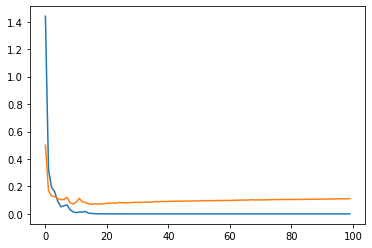

In [ ]:
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

#전체의 30퍼센트는 검증용
X = digits.data
Y = digits.target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.3)

X_train = torch.tensor(X_train, dtype = torch.float32)
Y_train = torch.tensor(Y_train, dtype = torch.int64)
X_test = torch.tensor(X_test, dtype = torch.float32)
Y_test = torch.tensor(Y_test, dtype = torch.int64)


#여러층을 쌓아서 깊은 신경망을 구축한다.
k = 100
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Linear(k,10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

ds = TensorDataset(X_train,Y_train)
loader = DataLoader(ds, batch_size = 32, shuffle = True)

train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  for i,(xx,yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  
  train_losses.append(running_loss/i)
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred,Y_test)
  test_losses.append(test_loss.item())

plt.plot(train_losses)
plt.plot(test_losses)




 위와 같은 과학습을 방지하는 것을 정규화 (regularization)이라고 한다.
 
 다양한 정규화가 있지만 신경망에서 자주 사용되는 dropout에 대해 알아보자.

> **dropou**t: 몇개의 노드를 랜덤으로 선택하여 의도적으로 사용하지 않는 것

  dropout은 신경망 훈련시에만 사용하고 예측시에는 사용하지 않는다.

  pytorch에서는 모델의 train과 eval 메소드로 dropout을 적용/미적용 할 수 있다.



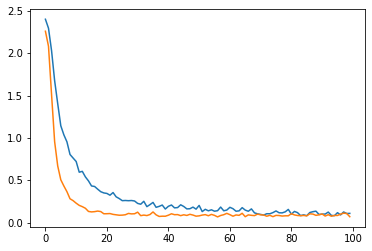

In [ ]:
# 확률 0.5로 랜덤으로 변수의 차원을 버리는 dropout을 각 층에 추가하기
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(k,10)
)

# train과 eval method로 dropout 처리 적용/미적용

optimizer = optim.Adam(net.parameters())

train_losses = []
test_losses = []
for epoch in range(100):
  running_loss = 0.0
  #신경망을 훈련모드로 설정
  net.train()
  for i,(xx,yy) in enumerate(loader):
    y_pred = net(xx)
    loss = loss_fn(y_pred,yy)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
  train_losses.append(running_loss/i)

  #신경망을 평가모드로 설정하고 검증데이터의 손실함수를 계산
  net.eval()
  y_pred = net(X_test)
  test_loss = loss_fn(y_pred,Y_test)
  test_losses.append(test_loss.item())

plt.plot(train_losses)
plt.plot(test_losses)


**Batch Normalization을 사용한 학습 가속**


In [ ]:
net = nn.Sequential(
    nn.Linear(64,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    nn.Linear(k,10)
)

**< 신경망의 모듈화 >**

  - 파이토치에서 자체 신경망 계층을 만들려면 nn.Module을 상속해서 클래스를 정의하면 된다.
  (nn.Module ; nn.Linear를 포함한 모든 계층의 기반 클래스)

  - 커스텀 계층을 만들 때에 forward 메서드를 구현하면 자동 미분까지 가능해진다. 

In [ ]:
class CustomLinear(nn.Module):
  def __init__(self,in_features, out_features, bias = True, p = 0.5):
    super().__init__()

    self.linear = nn.Linear(in_features, out_features, bias)
    self.relu = nn.ReLU()
    self.drop = nn.Dropout(p)
    
    def forward(self,x):
      x = self.linear(x)
      x = self.relu(x)
      x = self.drop(x)
      return x


mlp = nn.Sequential(
    CustomLinear(64,200),
    CustomLinear(200,200),
    CustomLinear(200,10)
)

In [ ]:
# nn.Sequential을 사용하지 않고 nn.Module을 상속하여 클래스 내에서 모든 처리를 할 수 있음
class MyMLP(nn.Module):
  def __init__(self, in_features, out_features):
    super().__init__()
    self.ln1 = CustomLinear(in_features, 200)
    self.ln2 = CustomLinear(200, 200)
    self.ln3 = CustomLinear(200, 200)
    self.ln4 = CustomLinear(200, out_features)

  def forward(self,x):
    x = self.ln1(x)
    x = self.ln2(x)
    x = self.ln3(x)
    x = self.ln4(x)
    return x
  
mlp = MyMLP(64,10)